# Part 2 - time series 

# חשיפה לפנים  -  Social doors עבור מטלת  fMRI פעילות

In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np
import pandas as pd 

In [2]:
import pandas as pd 
path1 = r'sourcedata/sub-1001/sub-1001_face-A.tsv'
df_SUB1001 = pd.read_csv(path1, sep='\t')
df_SUB1001.head()  #העלת קובץ של המטלה עבור נבדק 1 

#df_SUB1001=pd.read_csv(r'C:\Users\jacky\Documents\projects\FINAL_PROJECT\sourcedata\sub-1001\sub-1001_face-A.tsv', sep='\t')
#df_SUB1001 #העלת קובץ של המטלה עבור נבדק 1 

,onset,duration,trial_type,rt,resp
0,0.000410,0.606841,fixation_1,999.000000,999.0
1,0.607378,3.005810,face,2.569222,3.0
2,3.613239,0.606841,fixation_2,999.000000,999.0
3,4.160578,1.000604,feedback win,999.000000,999.0
4,5.161194,5.317434,ITI,999.000000,999.0


In [3]:
path2 = r'sourcedata\sub-1002\sub-1002_face-A.tsv'
df_SUB1002 = pd.read_csv(path2, sep='\t')
df_SUB1002.head() #העלת קובץ של המטלה עבור נבדק 2 

#df_SUB1002=pd.read_csv(r'C:\Users\jacky\Documents\projects\FINAL_PROJECT\sourcedata\sub-1002\sub-1002_face-A.tsv', sep='\t')
#df_SUB1002 #העלת קובץ של המטלה עבור נבדק 2 


,onset,duration,trial_type,rt,resp
0,0.000427,0.61442,fixation_1,999.000000,999
1,0.614937,3.00577,face,2.067549,2
2,3.620755,0.61442,fixation_2,999.000000,999
3,4.167846,1.00063,feedback win,999.000000,999
4,5.168480,5.31699,ITI,999.000000,999


In [4]:
path3 = r'sourcedata\sub-1003\sub-1003_face-A.tsv'
df_SUB1003 = pd.read_csv(path3, sep='\t')
df_SUB1003.head() #העלת קובץ של המטלה עבור נבדק 3 


#df_SUB1003=pd.read_csv(r'C:\Users\jacky\Documents\projects\FINAL_PROJECT\sourcedata\sub-1003\sub-1003_face-A.tsv ', sep='\t')
#df_SUB1003 #העלת קובץ של המטלה עבור נבדק 3 

,onset,duration,trial_type,rt,resp
0,0.000441,0.616379,fixation_1,999.000000,999
1,0.616913,3.005572,face,1.800726,2
2,3.622532,0.616379,fixation_2,999.000000,999
3,4.169295,1.001309,feedback win,999.000000,999
4,5.170608,5.315993,ITI,999.000000,999


In [5]:
path4 = r'sourcedata\sub-1004\sub-1004_face-A.tsv'
df_SUB1004 = pd.read_csv(path4, sep='\t')
df_SUB1004.head() #העלת קובץ של המטלה עבור נבדק 4 

#df_SUB1004=pd.read_csv(r'C:\Users\jacky\Documents\projects\FINAL_PROJECT\sourcedata\sub-1004\sub-1004_face-A.tsv ', sep='\t')
#df_SUB1004 #העלת קובץ של המטלה עבור נבדק 4 

,onset,duration,trial_type,rt,resp
0,0.000478,0.617255,fixation_1,999.000000,999.0
1,0.617814,3.006796,face,2.318765,3.0
2,3.624664,0.617255,fixation_2,999.000000,999.0
3,4.170907,1.000880,feedback win,999.000000,999.0
4,5.171790,5.316201,ITI,999.000000,999.0


In [6]:
df_SUB1001["subject_id"] = "SUB1001" #כדי שאוכל להציג לאחר מכן פר נבדק 
df_SUB1002["subject_id"] = "SUB1002"
df_SUB1003["subject_id"] = "SUB1003"
df_SUB1004["subject_id"] = "SUB1004"
mydataframe = [df_SUB1001,df_SUB1002, df_SUB1003, df_SUB1004]
merged_mydataframe = pd.concat(mydataframe, ignore_index=True) #חיבור בין נתונים ליצירת עמודה של הנבדקים 
merged_mydataframe

,onset,duration,trial_type,rt,resp,subject_id
0,0.000410,0.606841,fixation_1,999.000000,999.0,SUB1001
1,0.607378,3.005810,face,2.569222,3.0,SUB1001
2,3.613239,0.606841,fixation_2,999.000000,999.0,SUB1001
3,4.160578,1.000604,feedback win,999.000000,999.0,SUB1001
4,5.161194,5.317434,ITI,999.000000,999.0,SUB1001
...,...,...,...,...,...,...
1195,492.224707,0.597444,fixation_1,999.000000,999.0,SUB1004
1196,492.822327,3.006236,face,1.550338,3.0,SUB1004
1197,495.828612,0.597444,fixation_2,999.000000,999.0,SUB1004
1198,496.375075,1.000772,feedback loss,999.000000,999.0,SUB1004


In [7]:
merged_mydataframe.iloc[0:5] #ייצוג של 5 עמודות ראשונות 

,onset,duration,trial_type,rt,resp,subject_id
0,0.000410,0.606841,fixation_1,999.000000,999.0,SUB1001
1,0.607378,3.005810,face,2.569222,3.0,SUB1001
2,3.613239,0.606841,fixation_2,999.000000,999.0,SUB1001
3,4.160578,1.000604,feedback win,999.000000,999.0,SUB1001
4,5.161194,5.317434,ITI,999.000000,999.0,SUB1001


In [8]:
merged_mydataframe.isnull().sum() #בדיקת ערכים חסרים 

onset         0
duration      0
trial_type    0
rt            2
resp          2
subject_id    0
dtype: int64

In [9]:
merged_mydataframe = merged_mydataframe.bfill() #מילוי ערכים חסרים 

In [10]:
merged_mydataframe.isnull().sum() #בדיקת ערכים חסרים 

onset         0
duration      0
trial_type    0
rt            0
resp          0
subject_id    0
dtype: int64

In [11]:
merged_mydataframe.columns #בדיקה מה העמודות שמופיעות 

Index(['onset', 'duration', 'trial_type', 'rt', 'resp', 'subject_id'], dtype='object')

In [12]:
grouped_table_values_by_subject_id_face = merged_mydataframe.groupby("subject_id")["rt"].apply(list).reset_index() #זמן תגובה מוח 
grouped_table_values_by_subject_id_face["subject_id"] = grouped_table_values_by_subject_id_face["subject_id"] #הוספה של עמודת הנבדקים 
end_grouped_table_values_by_subject_id_face = grouped_table_values_by_subject_id_face["rt"].apply(pd.Series) #סיום תגובה זאת עמודה נפרדת 
end_grouped_table_values_by_subject_id_face.columns = [f't{i+1}' for i in range(end_grouped_table_values_by_subject_id_face.shape[1])]#יצירת שמות בהתאמה לכל העמודה 
end_grouped_table_values_by_subject_id_face

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t291,t292,t293,t294,t295,t296,t297,t298,t299,t300
0,999.0,2.569222,999.0,999.0,999.0,999.0,2.568094,999.0,999.0,999.0,...,999.0,1.045866,999.0,999.0,999.0,999.0,1.550472,999.0,999.0,999.0
1,999.0,2.067549,999.0,999.0,999.0,999.0,2.063486,999.0,999.0,999.0,...,999.0,1.550310,999.0,999.0,999.0,999.0,2.050891,999.0,999.0,999.0
2,999.0,1.800726,999.0,999.0,999.0,999.0,1.800898,999.0,999.0,999.0,...,999.0,3.079166,999.0,999.0,999.0,999.0,2.317854,999.0,999.0,999.0
3,999.0,2.318765,999.0,999.0,999.0,999.0,1.801087,999.0,999.0,999.0,...,999.0,2.067708,999.0,999.0,999.0,999.0,1.550338,999.0,999.0,999.0


grouped_subject_id_face = merged_mydataframe.groupby("subject_id")["resp"].apply(list).reset_index() #זמן תגובה בפועל  
grouped_subject_id_face["subject_id"] = grouped_subject_id_face["subject_id"] #הוספה של עמודת הנבדקים 
end_grouped_subject_id_face = grouped_subject_id_face["resp"].apply(pd.Series) #סיום תגובה זאת עמודה נפרדת 
end_grouped_subject_id_face.columns = [f't{i+1}' for i in range(end_grouped_subject_id_face.shape[1])]#יצירת שמות בהתאמה לכל העמודה 
end_grouped_subject_id_face

In [13]:
grouped_subject_id_face = merged_mydataframe.groupby("subject_id")["rt"].apply(list).reset_index()
#  יצירת טבלה חדשה עם כל אחת מהתוצאות כתור (כל ערך מתוך rt)
end_grouped_subject_id_face = grouped_subject_id_face["rt"].apply(pd.Series)
# שינוי שם העמודות כך שתהיה התייחסות ל -t1, t2, t3 
end_grouped_subject_id_face.columns = [f't{i+1}' for i in range(end_grouped_subject_id_face.shape[1])]
#  המרת הטבלה כך שהערכים יהיו בשורות ולא בעמודות
end_grouped_subject_id_face = end_grouped_subject_id_face.T
#  שינוי השמות של השורות ל-0, 1, 2, 3 וכו
end_grouped_subject_id_face.index = [str(i) for i in range(end_grouped_subject_id_face.shape[0])]
end_grouped_subject_id_face

,0,1,2,3
0,999.000000,999.000000,999.000000,999.000000
1,2.569222,2.067549,1.800726,2.318765
2,999.000000,999.000000,999.000000,999.000000
3,999.000000,999.000000,999.000000,999.000000
4,999.000000,999.000000,999.000000,999.000000
...,...,...,...,...
295,999.000000,999.000000,999.000000,999.000000
296,1.550472,2.050891,2.317854,1.550338
297,999.000000,999.000000,999.000000,999.000000
298,999.000000,999.000000,999.000000,999.000000


In [14]:
#  קיבוץ לפי subject_id ויצירת רשימת ערכים עבור כל subject
grouped_subject_id_face =  merged_mydataframe.groupby("subject_id")["rt"].apply(list).reset_index()
#  הפיכת רשימת הערכים לעמודות נפרדות
end_grouped_subject_id_face_face= grouped_subject_id_face["rt"].apply(pd.Series)
#  יצירת שמות עמודות דינמיים (t1, t2, t3, ...)
end_grouped_subject_id_face_face.columns = [f't{i+1}' for i in range(end_grouped_subject_id_face_face.shape[1])]
#   המרת ה- subject_id כך שיתפקד כעמודה בשם t1, t2, t3, וכו'
# כל subject_id יהפוך לעמודה חדשה, עם הערכים שמבוססים על סדר ה-t
subjects_as_columns2 = end_grouped_subject_id_face_face.T
subjects_as_columns2.columns = [f'subject_{subject}' for subject in grouped_subject_id_face["subject_id"]]
# הצגת התוצאה
subjects_as_columns2

,subject_SUB1001,subject_SUB1002,subject_SUB1003,subject_SUB1004
t1,999.000000,999.000000,999.000000,999.000000
t2,2.569222,2.067549,1.800726,2.318765
t3,999.000000,999.000000,999.000000,999.000000
t4,999.000000,999.000000,999.000000,999.000000
t5,999.000000,999.000000,999.000000,999.000000
...,...,...,...,...
t296,999.000000,999.000000,999.000000,999.000000
t297,1.550472,2.050891,2.317854,1.550338
t298,999.000000,999.000000,999.000000,999.000000
t299,999.000000,999.000000,999.000000,999.000000


In [15]:
subjects_as_columns2.isnull().sum() #בדיקת ערכים חסרים 

subject_SUB1001    0
subject_SUB1002    0
subject_SUB1003    0
subject_SUB1004    0
dtype: int64

In [16]:
subjects_as_columns2 = subjects_as_columns2.bfill() #מילוי ערכים חסרים 

In [17]:
subjects_as_columns2.isnull().sum() #בדיקת ערכים חסרים 

subject_SUB1001    0
subject_SUB1002    0
subject_SUB1003    0
subject_SUB1004    0
dtype: int64

# ניתוח FMRI

In [18]:
merged_mydataframe['reaction_fmri'] = merged_mydataframe['resp'] - merged_mydataframe['rt']
merged_mydataframe

,onset,duration,trial_type,rt,resp,subject_id,reaction_fmri
0,0.000410,0.606841,fixation_1,999.000000,999.0,SUB1001,0.000000
1,0.607378,3.005810,face,2.569222,3.0,SUB1001,0.430778
2,3.613239,0.606841,fixation_2,999.000000,999.0,SUB1001,0.000000
3,4.160578,1.000604,feedback win,999.000000,999.0,SUB1001,0.000000
4,5.161194,5.317434,ITI,999.000000,999.0,SUB1001,0.000000
...,...,...,...,...,...,...,...
1195,492.224707,0.597444,fixation_1,999.000000,999.0,SUB1004,0.000000
1196,492.822327,3.006236,face,1.550338,3.0,SUB1004,1.449662
1197,495.828612,0.597444,fixation_2,999.000000,999.0,SUB1004,0.000000
1198,496.375075,1.000772,feedback loss,999.000000,999.0,SUB1004,0.000000


In [19]:
merged_mydataframe['reaction_fmri'].isnull().sum().sum()

np.int64(0)

In [20]:
merged_mydataframe.bfill()

,onset,duration,trial_type,rt,resp,subject_id,reaction_fmri
0,0.000410,0.606841,fixation_1,999.000000,999.0,SUB1001,0.000000
1,0.607378,3.005810,face,2.569222,3.0,SUB1001,0.430778
2,3.613239,0.606841,fixation_2,999.000000,999.0,SUB1001,0.000000
3,4.160578,1.000604,feedback win,999.000000,999.0,SUB1001,0.000000
4,5.161194,5.317434,ITI,999.000000,999.0,SUB1001,0.000000
...,...,...,...,...,...,...,...
1195,492.224707,0.597444,fixation_1,999.000000,999.0,SUB1004,0.000000
1196,492.822327,3.006236,face,1.550338,3.0,SUB1004,1.449662
1197,495.828612,0.597444,fixation_2,999.000000,999.0,SUB1004,0.000000
1198,496.375075,1.000772,feedback loss,999.000000,999.0,SUB1004,0.000000


In [21]:
merged_mydataframe.isnull().sum().sum()

np.int64(0)

In [22]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
pearson_corr, p_value_pearson = pearsonr(merged_mydataframe['reaction_fmri'], merged_mydataframe['resp'])
print(f"Pearson Correlation: {pearson_corr}, p-value: {p_value_pearson}") #מתאם פירסון 
spearman_corr, p_value_spearman = spearmanr(merged_mydataframe['reaction_fmri'], merged_mydataframe['resp'])
print(f"Spearman Correlation: {spearman_corr}, p-value: {p_value_spearman}") #מתאם ספירמן 


Pearson Correlation: -0.637462386483717, p-value: 7.920590319269958e-138
Spearman Correlation: -0.5028602199912773, p-value: 6.683080784468479e-78


In [23]:
import statsmodels.api as sm #רגרסיה ליניארית 
X = merged_mydataframe['resp']  # משתנה מסביר
y = merged_mydataframe['reaction_fmri']  # משתנה מוסבר
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          reaction_fmri   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     820.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.92e-138
Time:                        10:11:10   Log-Likelihood:                -127.38
No. Observations:                1200   AIC:                             258.8
Df Residuals:                    1198   BIC:                             268.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5597      0.017     31.987      0.0

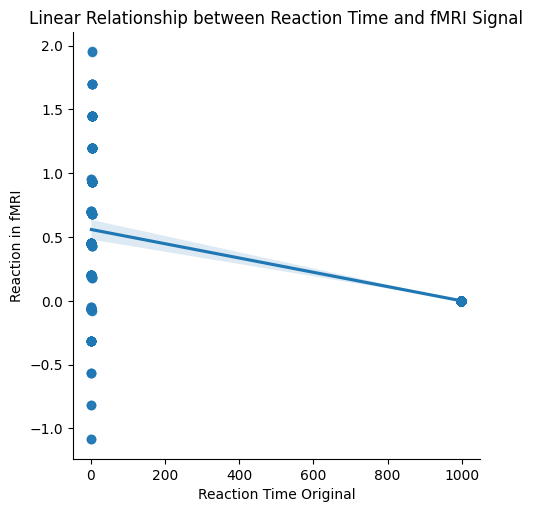

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x='resp', y='reaction_fmri', data=merged_mydataframe)
plt.xlabel('Reaction Time Original')
plt.ylabel('Reaction in fMRI')
plt.title('Linear Relationship between Reaction Time and fMRI Signal')
plt.show()


# סיגנאלים לתמונות של פנים 

In [25]:
df_SUB1001["subject_id"] = "SUB1001" #כדי שאוכל להציג לאחר מכן פר נבדק 
df_SUB1002["subject_id"] = "SUB1002"
df_SUB1003["subject_id"] = "SUB1003"
df_SUB1004["subject_id"] = "SUB1004"
mydataframe = [df_SUB1001,df_SUB1002, df_SUB1003, df_SUB1004]
merged_mydataframe = pd.concat(mydataframe, ignore_index=True) #חיבור בין נתונים ליצירת עמודה של הנבדקים 
merged_mydataframe

,onset,duration,trial_type,rt,resp,subject_id
0,0.000410,0.606841,fixation_1,999.000000,999.0,SUB1001
1,0.607378,3.005810,face,2.569222,3.0,SUB1001
2,3.613239,0.606841,fixation_2,999.000000,999.0,SUB1001
3,4.160578,1.000604,feedback win,999.000000,999.0,SUB1001
4,5.161194,5.317434,ITI,999.000000,999.0,SUB1001
...,...,...,...,...,...,...
1195,492.224707,0.597444,fixation_1,999.000000,999.0,SUB1004
1196,492.822327,3.006236,face,1.550338,3.0,SUB1004
1197,495.828612,0.597444,fixation_2,999.000000,999.0,SUB1004
1198,496.375075,1.000772,feedback loss,999.000000,999.0,SUB1004


In [26]:
merged_mydataframe["rt"] #זמן תגובה ,פלטור לפי עמודה 

0       999.000000
1         2.569222
2       999.000000
3       999.000000
4       999.000000
           ...    
1195    999.000000
1196      1.550338
1197    999.000000
1198    999.000000
1199    999.000000
Name: rt, Length: 1200, dtype: float64

In [27]:
df = merged_mydataframe.groupby("subject_id")["onset"].first()  # הצגה של משתנה onset פר נבדק
print(df)

subject_id
SUB1001    0.000410
SUB1002    0.000427
SUB1003    0.000441
SUB1004    0.000478
Name: onset, dtype: float64


In [28]:
df = merged_mydataframe.groupby("subject_id")["rt"].first()  # הצגה של משתנה rt פר נבדק
print(df)

subject_id
SUB1001    999.0
SUB1002    999.0
SUB1003    999.0
SUB1004    999.0
Name: rt, dtype: float64


In [29]:
merged_mydataframe.head()

,onset,duration,trial_type,rt,resp,subject_id
0,0.000410,0.606841,fixation_1,999.000000,999.0,SUB1001
1,0.607378,3.005810,face,2.569222,3.0,SUB1001
2,3.613239,0.606841,fixation_2,999.000000,999.0,SUB1001
3,4.160578,1.000604,feedback win,999.000000,999.0,SUB1001
4,5.161194,5.317434,ITI,999.000000,999.0,SUB1001


In [30]:
df_range = pd.DataFrame(merged_mydataframe)
df_range['end'] = df_range['onset'] + df_range['duration']  # חישוב סיום כל ניסוי
df_range

,onset,duration,trial_type,rt,resp,subject_id,end
0,0.000410,0.606841,fixation_1,999.000000,999.0,SUB1001,0.607251
1,0.607378,3.005810,face,2.569222,3.0,SUB1001,3.613189
2,3.613239,0.606841,fixation_2,999.000000,999.0,SUB1001,4.220080
3,4.160578,1.000604,feedback win,999.000000,999.0,SUB1001,5.161182
4,5.161194,5.317434,ITI,999.000000,999.0,SUB1001,10.478627
...,...,...,...,...,...,...,...
1195,492.224707,0.597444,fixation_1,999.000000,999.0,SUB1004,492.822151
1196,492.822327,3.006236,face,1.550338,3.0,SUB1004,495.828563
1197,495.828612,0.597444,fixation_2,999.000000,999.0,SUB1004,496.426056
1198,496.375075,1.000772,feedback loss,999.000000,999.0,SUB1004,497.375848


In [31]:
print(df_range.head())  # מציג את 5 השורות הראשונות בדאטה פריים
print(df_range.columns)  # מציג את שמות העמודות

      onset  duration    trial_type          rt   resp subject_id        end
0  0.000410  0.606841    fixation_1  999.000000  999.0    SUB1001   0.607251
1  0.607378  3.005810          face    2.569222    3.0    SUB1001   3.613189
2  3.613239  0.606841    fixation_2  999.000000  999.0    SUB1001   4.220080
3  4.160578  1.000604  feedback win  999.000000  999.0    SUB1001   5.161182
4  5.161194  5.317434           ITI  999.000000  999.0    SUB1001  10.478627
Index(['onset', 'duration', 'trial_type', 'rt', 'resp', 'subject_id', 'end'], dtype='object')


In [32]:
print(df_range.isnull().sum().sum())#בדיקת ערכים חסרים 

4


In [33]:
df_range = df_range.bfill()#מילוי ערכים חסרים בערכים הבאים 

In [34]:
print(df_range.isnull().sum().sum())#בדיקת ערכים חסרים 

0


In [35]:
print(df_range.columns) #בדיקת עמודות 

Index(['onset', 'duration', 'trial_type', 'rt', 'resp', 'subject_id', 'end'], dtype='object')


In [36]:
import numpy as np
import matplotlib.pyplot as plt 
selected_colums=df_range[['subject_id','rt', 'end']] #טבלה רק של 3 מדדים של זמן תגובה 
selected_colums

,subject_id,rt,end
0,SUB1001,999.000000,0.607251
1,SUB1001,2.569222,3.613189
2,SUB1001,999.000000,4.220080
3,SUB1001,999.000000,5.161182
4,SUB1001,999.000000,10.478627
...,...,...,...
1195,SUB1004,999.000000,492.822151
1196,SUB1004,1.550338,495.828563
1197,SUB1004,999.000000,496.426056
1198,SUB1004,999.000000,497.375848


In [37]:
df_range['end'] = pd.to_numeric(df_range['end'],errors='coerce')#המרה לנומרי 

In [38]:
print(df_range.isnull().sum().sum())

0


In [39]:
selected_colums.columns #מה העמודות שלי 

Index(['subject_id', 'rt', 'end'], dtype='object')

In [40]:

grouped_table = df_range.groupby("subject_id")["end"].apply(list).reset_index() #ערכים לבטלת של נבדקים עבור END- סיום התגובה 
grouped_table["subject_id"] = grouped_table["subject_id"] #הוספה של עמודת הנבדקים 
df_range_end_columns = grouped_table["end"].apply(pd.Series) #סיום תגובה זאת עמודה נפרדת 
df_range_end_columns.columns = [f't{i+1}' for i in range(df_range_end_columns .shape[1])]#יצירת שמות בהתאמה לכל העמודה 
df_range_end_columns ["subject_id"] = grouped_table["subject_id"] #עמודות של הנבדקים הן נפרדות 
df_range_end_columns ['original_end'] = grouped_table['end'] #שמירה על הערכים המקוריים 
df_range_end_columns = df_range_end_columns[['subject_id'] + [col for col in df_range_end_columns.columns if col != 'subject_id']]
df_range_end_columns 


,subject_id,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t292,t293,t294,t295,t296,t297,t298,t299,t300,original_end
0,SUB1001,0.607251,3.613189,4.220080,5.161182,10.478627,11.082435,14.088614,14.682488,15.636388,...,485.543686,486.141319,487.090170,492.407662,493.011650,496.017624,496.614296,497.565994,502.881598,"[0.6072510352823883, 3.6131885633803904, 4.220..."
1,SUB1002,0.614847,3.620707,4.235175,5.168476,10.485469,11.090081,14.096657,14.691871,15.643932,...,485.215621,485.813787,486.763938,492.080435,492.685630,495.692688,496.290438,497.239163,502.555657,"[0.6148470503976567, 3.6207069972297177, 4.235..."
2,SUB1003,0.616820,3.622484,4.238911,5.170605,10.486601,11.091565,14.097558,14.691815,15.645207,...,488.231839,488.828149,489.784855,495.101614,495.705534,498.711509,499.308240,500.259828,505.576334,"[0.6168197864026296, 3.6224844218813814, 4.238..."
3,SUB1004,0.617733,3.624610,4.241919,5.171787,10.487992,11.093362,14.098569,14.694741,15.647206,...,485.353674,485.951993,486.900558,492.217588,492.822151,495.828563,496.426056,497.375848,502.692538,"[0.6177329503698274, 3.624610207276419, 4.2419..."


In [41]:
sample_friquency=300 #תדירות הדגימה
num_of_samples=4 #מספר דגימות 
duration_seconds=4/300*100 #משך דגימה בשניות
duration_seconds

1.3333333333333335

In [42]:
t = np.linspace(0, duration_seconds, int(sample_friquency * duration_seconds), endpoint=False) #כל ערכי זמן המייצגים את הדגימות במשך 0.1 שניה 
print(f"משך הדגימה בפועל: {len(t) / sample_friquency} שניות") 


משך הדגימה בפועל: 1.3333333333333333 שניות


In [43]:
freq1, freq2 = 5,50 #במחירת תדר נמוך וגבוה, אבל לא גבוה יותר מחצי של תדירות הדגימה (בשביל שלא תהיה סטייה גבוהה מדיי) 
signal=np.sin(2*np.pi*freq1*t)+0.5*np.sin(2*np.pi*freq2*t) #הפרש בין שני גלי סינוסים, חישוב הטדירות והאמפליטודה #מכפילים ב2 כי מחשבים סינוס ברדיאנים 2 פאי, אמפיטודה של סינוס בין 1 ל-1 אז אוכל להשתמש בערכים שביניהם 

In [44]:
fft_transform=np.fft.fft(signal) #המרה של זמן לתדירות 
frequencies=np.fft.fftfreq(len(signal),d=1/sample_friquency)

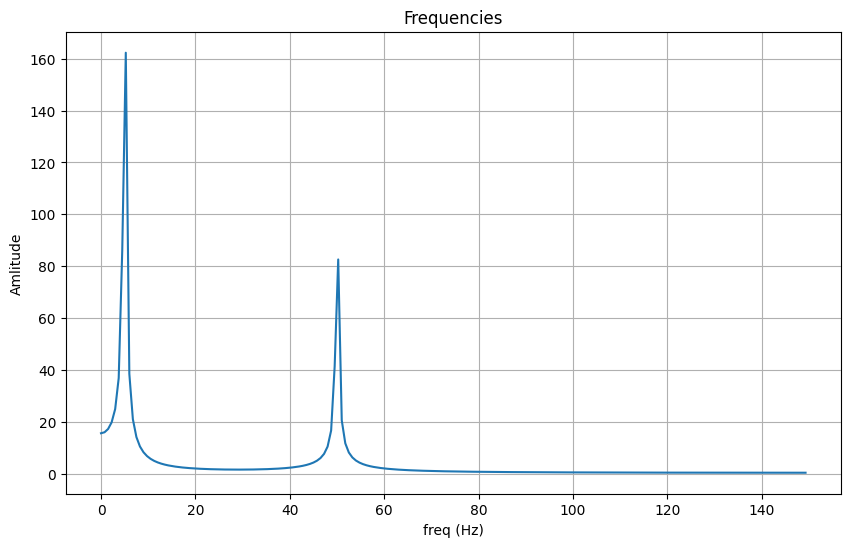

In [45]:

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_transform)[:len(fft_transform)//2]) #בוחרת תדרים חיוביים כי שליליים לא רלוונטיים לי 
plt.title('Frequencies')
plt.xlabel('freq (Hz)')
plt.ylabel('Amlitude')
plt.grid(True)
plt.show()

In [46]:
padded_signal=np.pad(signal,(0,300),mode='constant')#בגלל שהוספתי פילטר לפני כן ולא רוצה לאבד מידע 


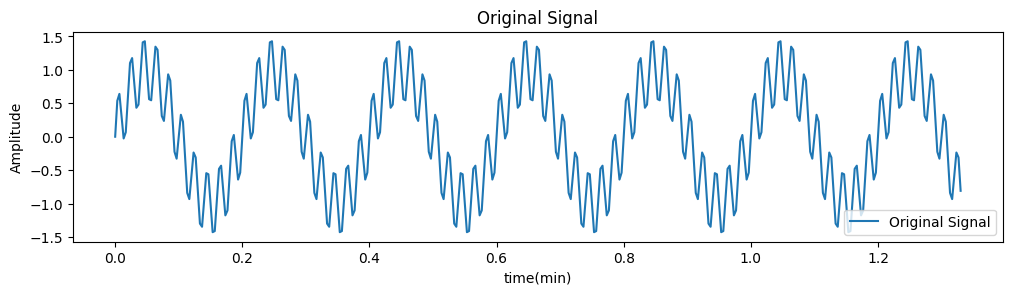

In [47]:
fft_transform=np.fft.fft(signal)
fft_padded=np.fft.fft(padded_signal)
frequencies=np.fft.fftfreq(len(signal),d=1/sample_friquency)
frequencies_padded=np.fft.fftfreq(len(padded_signal),d=1/sample_friquency)

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(t,signal,label="Original Signal")
plt.title('Original Signal')
plt.xlabel('time(min)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

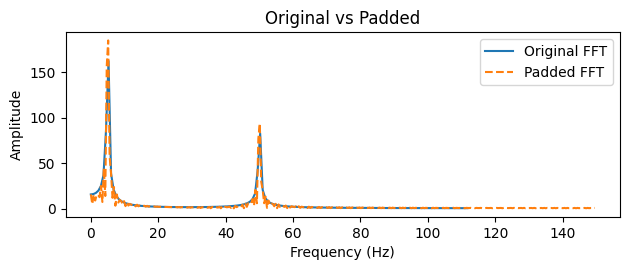

In [48]:
sample_frequency=300 
plt.subplot(2, 1, 2)
plt.plot(frequencies[:sample_frequency//2], np.abs(fft_transform)[:sample_frequency//2], label='Original FFT')
plt.plot(frequencies_padded[:len(padded_signal)//2], np.abs(fft_padded)[:len(padded_signal)//2], label='Padded FFT', linestyle='dashed')
plt.title('Original vs Padded')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

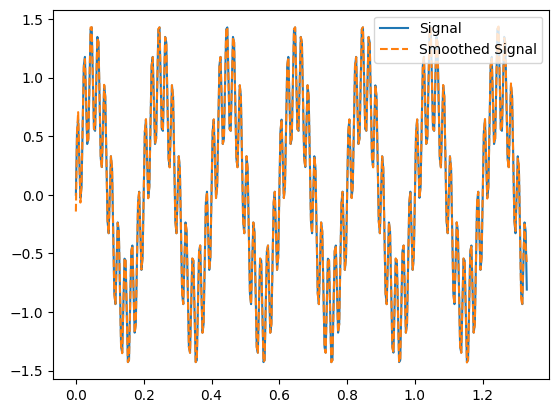

In [49]:
threshold=80  #פונקציה התחלתית לעומת פונקציה מפולטרת 
fft_transform[np.abs(frequencies) > threshold] = 0
smoothed_signal = np.fft.ifft(fft_transform)# חזרה לאות במרחב הזמן
plt.plot(t, signal, label="Signal")
plt.plot(t, smoothed_signal.real, label="Smoothed Signal", linestyle='--')
plt.legend()
plt.show()

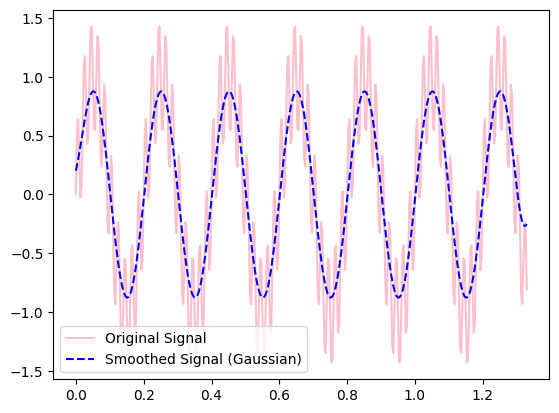

In [50]:
def gaussian_kernel(size, sigma=1): #החלקת פונקציה ''גאוסיאני'
    x = np.linspace(-size//2, size//2, size)
    kernel = np.exp(-0.5 * (x / sigma)**2)
    kernel = kernel / kernel.sum()  # נרמל את הגרעין כך שהסכום יהיה 1
    return kernel

kernel_size = 51
sigma = 5
gaussian = gaussian_kernel(kernel_size, sigma)
smoothed_signal = np.convolve(signal, gaussian, mode='same')
plt.plot(t, signal, color='pink', label="Original Signal")
plt.plot(t, smoothed_signal, color='blue', label="Smoothed Signal (Gaussian)", linestyle='--')
plt.legend()
plt.show()

# בדיקות פר נבדק 

In [51]:
print("מספר שורות:", df_range.shape[0])  # מספר השורות
print("מספר עמודות:", df_range.shape[1])  # מספר העמודות

מספר שורות: 1200
מספר עמודות: 7


In [52]:
sample_friquency1=342 #תדירות הדגימה 1200/3.5
num_of_samples=1200 #מספר דגימות 
duration_seconds1=3.5 #משך דגימה בדקות - מהמאמר
duration_seconds1

3.5

In [53]:
t1 = np.linspace(0, duration_seconds1, int(sample_friquency1 * duration_seconds1), endpoint=False) #כל ערכי זמן המייצגים את הדגימות במשך 0.1 שניה 
print(f"משך הדגימה בפועל: {len(t) / sample_friquency1} שניות") 

משך הדגימה בפועל: 1.1695906432748537 שניות


In [54]:
freq1=50 #בחרתי ערך נמוך וערך גבוהה 
freq2=300
signal2=np.sin(2*np.pi*freq1*t1)+0.5*np.sin(2*np.pi*freq2*t1)

In [55]:
fft_transform2=np.fft.fft(signal2) #המרה של זמן לתדירות 
frequencies2=np.fft.fftfreq(len(signal2),d=3.5/sample_friquency1)

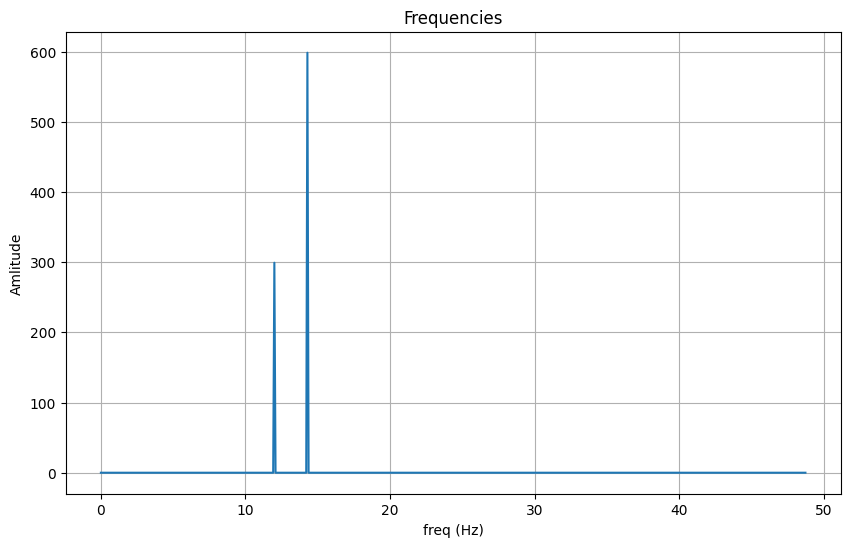

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies2[:len(frequencies2)//2], np.abs(fft_transform2)[:len(fft_transform2)//2]) #בוחרת תדרים חיוביים כי שליליים לא רלוונטיים לי 
plt.title('Frequencies')
plt.xlabel('freq (Hz)')
plt.ylabel('Amlitude')
plt.grid(True)
plt.show()

In [57]:
df_range_end_columns.columns

Index(['subject_id', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
       ...
       't292', 't293', 't294', 't295', 't296', 't297', 't298', 't299', 't300',
       'original_end'],
      dtype='object', length=302)

In [58]:
print(df_range_end_columns['subject_id'].unique())

['SUB1001' 'SUB1002' 'SUB1003' 'SUB1004']


In [59]:
if 'SUB1001' in df_range_end_columns.index:
    subset = df_range_end_columns.loc['SUB1001']
    subset.plot()
    plt.show()
else:
    print("שורה עם אינדקס 'SUB1001' לא נמצאה.")

שורה עם אינדקס 'SUB1001' לא נמצאה.


In [60]:
print(df_range_end_columns.index.dtype)


int64


In [61]:
df_range_end_columns = df_range_end_columns.drop('original_end', axis=1)  # axis=1 מציין שהפעולה היא על עמודות


# חישוב פר נבדק 1 

  subject_id        t1        t2       t3        t4         t5         t6  \
0    SUB1001  0.607251  3.613189  4.22008  5.161182  10.478627  11.082435   

          t7         t8         t9  ...        t291        t292        t293  \
0  14.088614  14.682488  15.636388  ...  482.536454  485.543686  486.141319   

        t294        t295       t296        t297        t298        t299  \
0  487.09017  492.407662  493.01165  496.017624  496.614296  497.565994   

         t300  
0  502.881598  

[1 rows x 301 columns]
[np.float64(0.6072510352823883) np.float64(3.6131885633803904)
 np.float64(4.220080370549113) np.float64(5.1611817459343)
 np.float64(10.478627434466034) np.float64(11.082435011398045)
 np.float64(14.088614037376827) np.float64(14.682488201302476)
 np.float64(15.636388362385333) np.float64(16.75461668544449)
 np.float64(17.354638480581343) np.float64(20.359947812277824)
 np.float64(20.95493075344712) np.float64(21.90809555351734)
 np.float64(23.025886161485687) np.float64(23

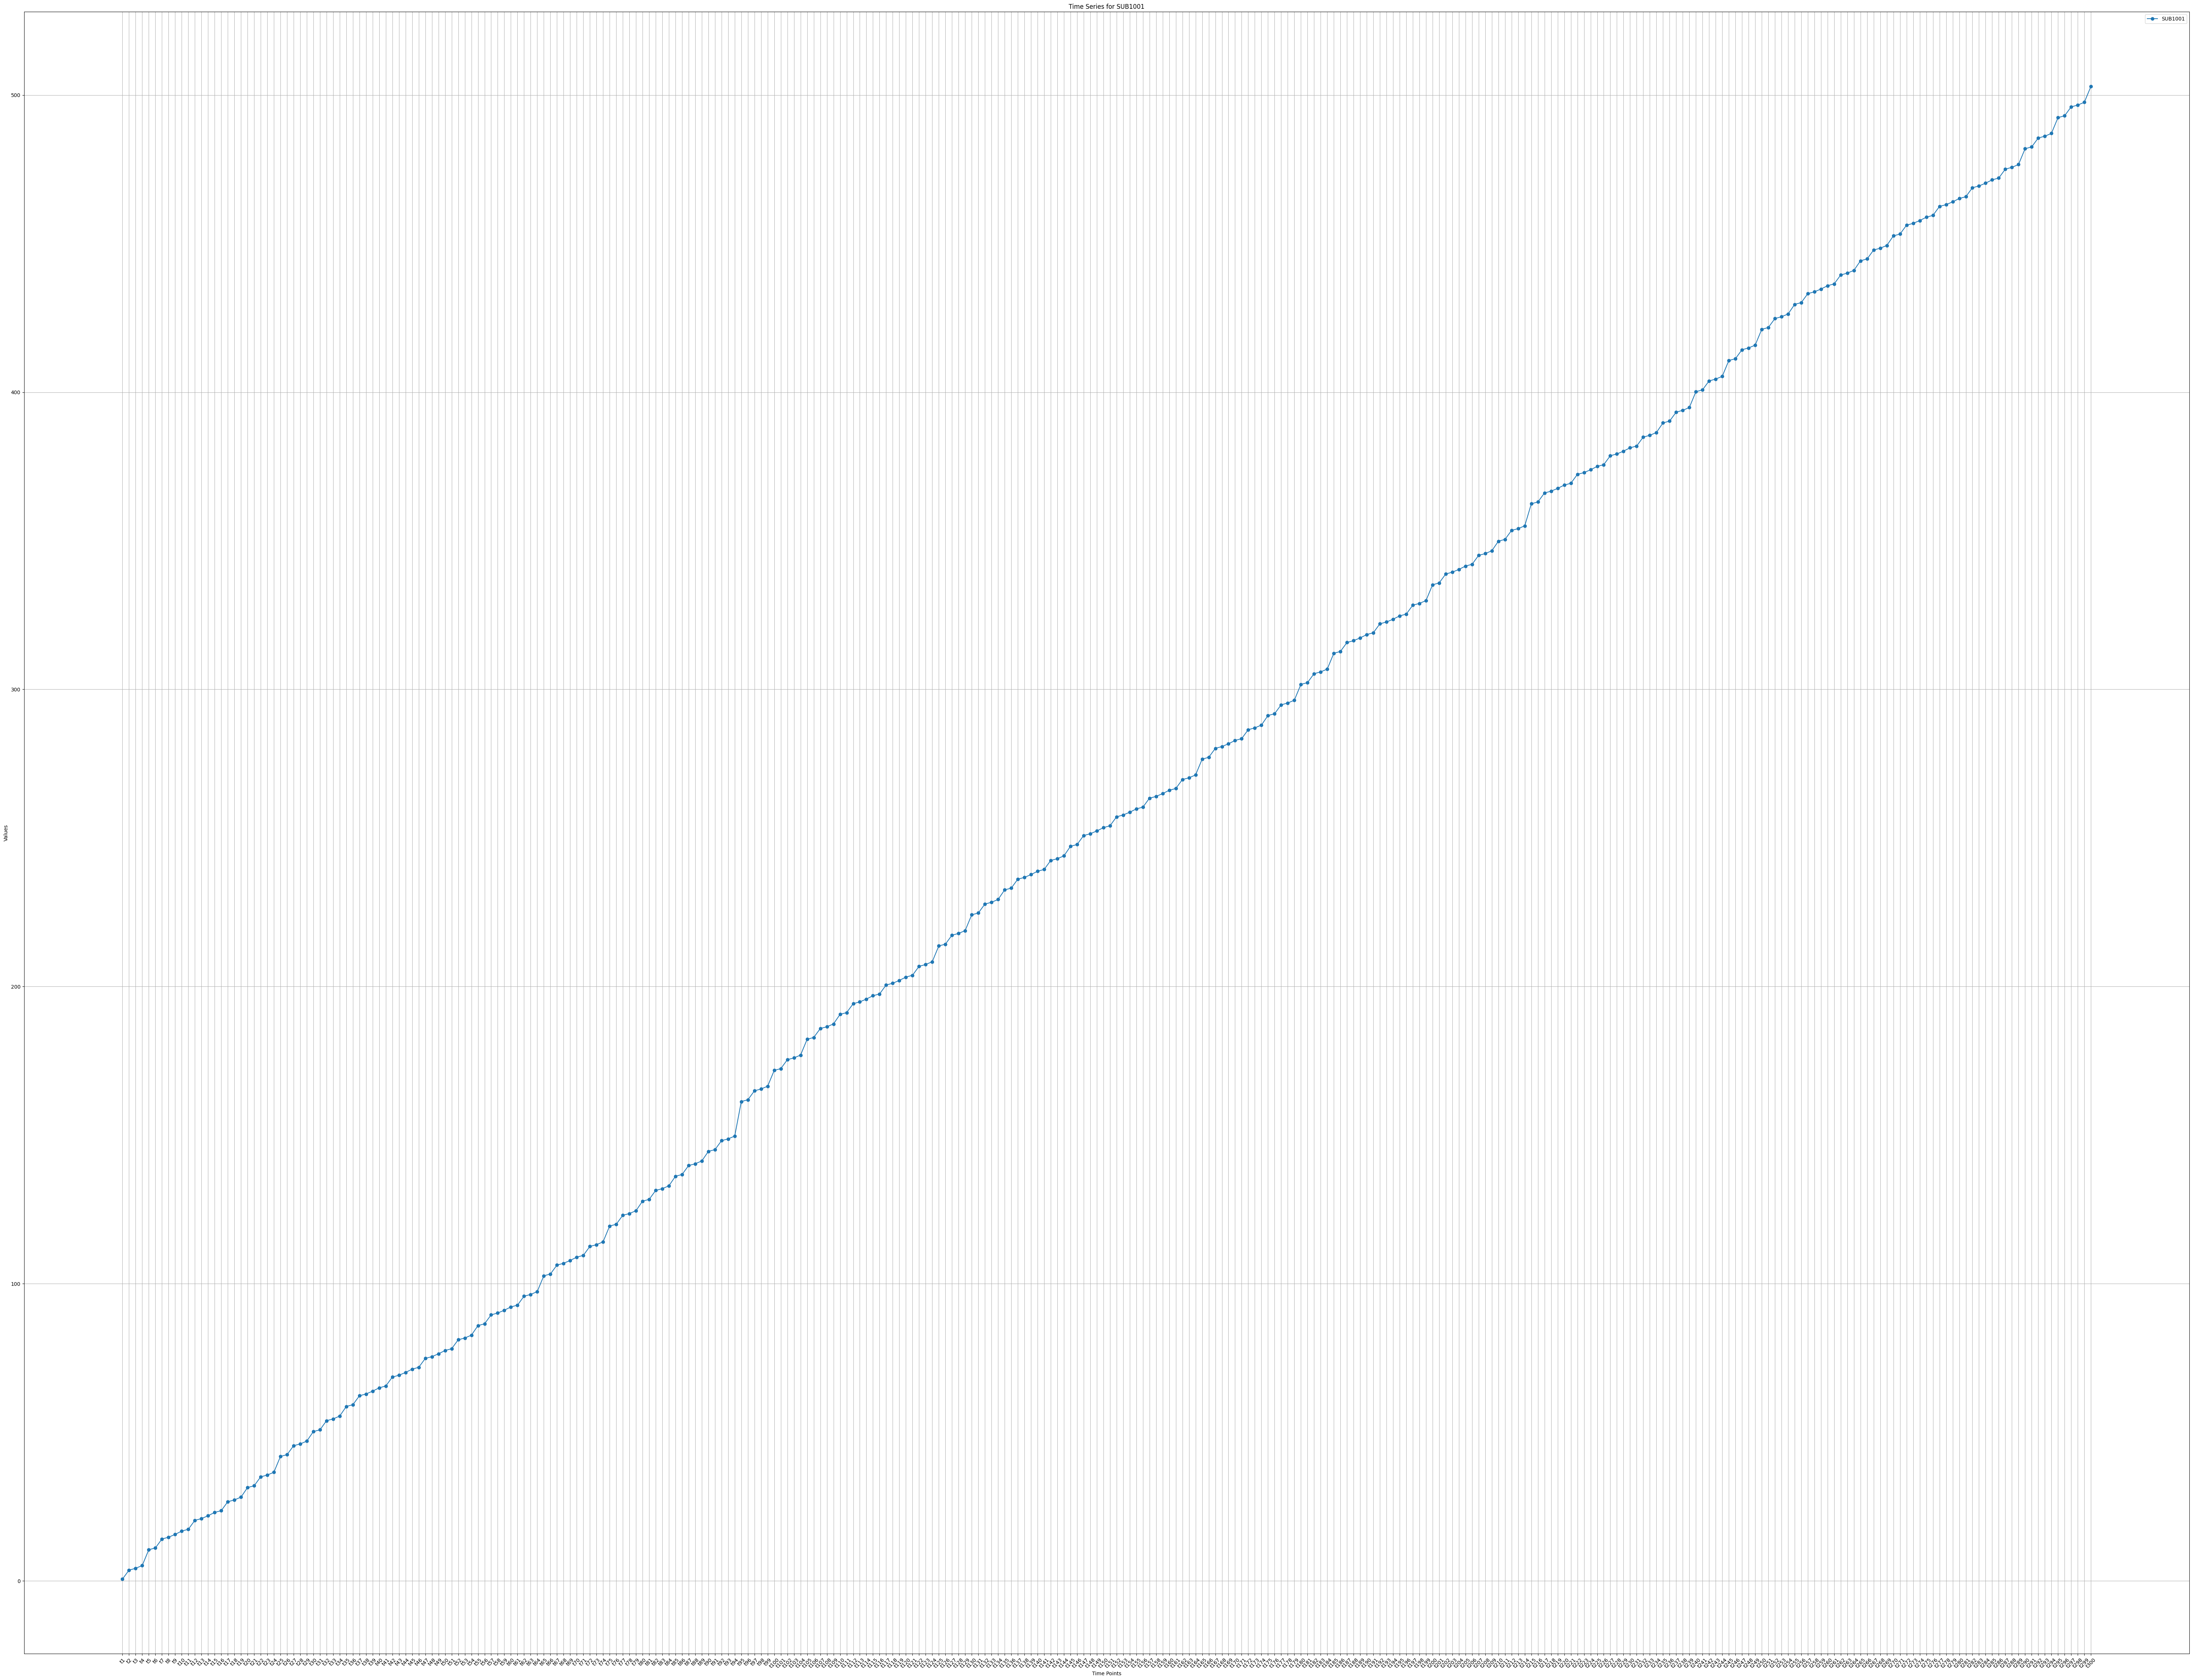

In [62]:
subject_data = df_range_end_columns[df_range_end_columns['subject_id'] == 'SUB1001'] #פלטור דאטה בשביל נבדק 1 
print(subject_data) #בדיקה שנבדק כולל את הערכים הנדרשים 

time_points = subject_data.columns[1:]  # Time points (e.g., t1, t2, t3, ...) עבור נבדק 1 
values = subject_data.iloc[0, 1:].values  # Values 
print(values)
plt.figure(figsize=(60, 46))
plt.plot(time_points, values, marker='o', label='SUB1001')
plt.title('Time Series for SUB1001')
plt.xlabel('Time Points')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
time_points_numeric = np.arange(len(time_points))
amplitudemy = 1  # גובה (Amplitude)
frequencymy = 1  # תדר (Frequency) ב-Hz
signalmy = amplitudemy * np.sin(2 * np.pi * frequencymy * time_points_numeric)

In [64]:
fft_signalmy = np.fft.fft(signalmy) #חיושב פוריה 
frequenciesmy = np.fft.fftfreq(len(signalmy), d=(time_points_numeric[1] - time_points_numeric[0]))

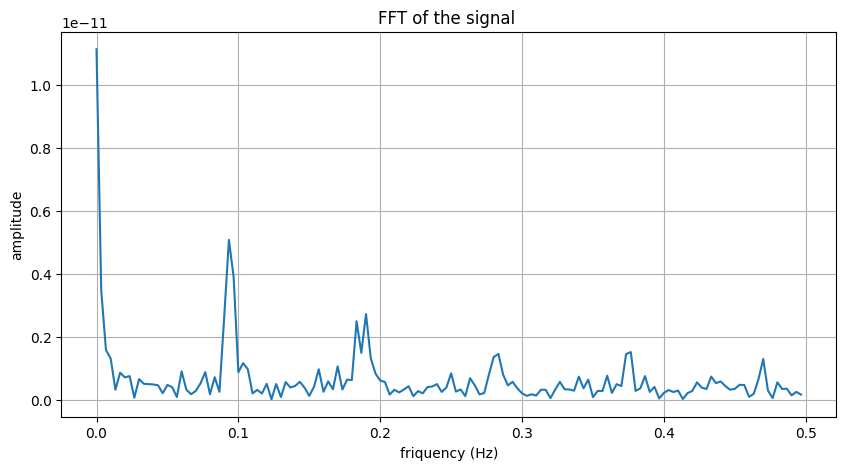

In [65]:
plt.figure(figsize=(10, 5)) #הצגת הFFT 
# הצגת התדרים האמיתיים
plt.plot(frequenciesmy[:len(frequenciesmy)//2], np.abs(fft_signalmy)[:len(fft_signalmy)//2])  # הצגת התדרים החיוביים
plt.title('FFT of the signal ')
plt.xlabel('friquency (Hz)')
plt.ylabel('amplitude')
plt.grid(True)
plt.show()

In [66]:
window_size = 50 #חלון גדול חסית אבל רואים פחות פרטים 
smoothed_signal = np.convolve(signalmy, np.ones(window_size)/window_size, mode='same') #החלקת הנתנים על ידי בחירת חלון 


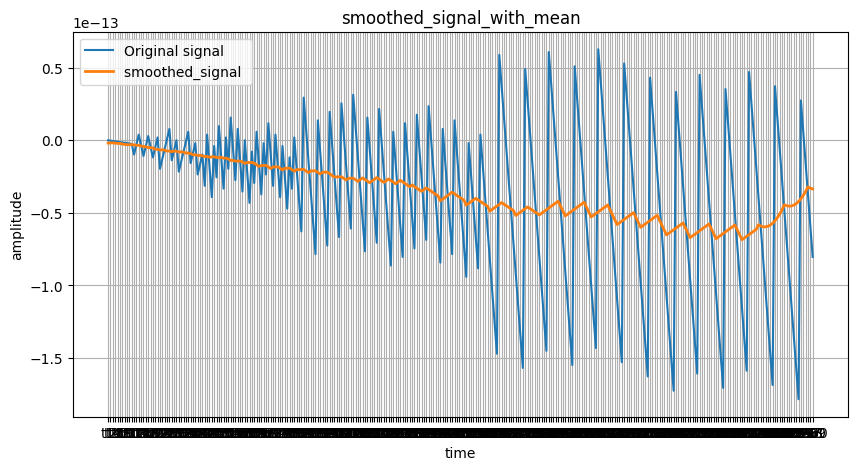

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(time_points, signalmy, label="Original signal")
plt.plot(time_points, smoothed_signal, label="smoothed_signal ", linewidth=2)
plt.title("smoothed_signal_with_mean")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [68]:
sigma = np.std(time_points_numeric) #בשביל גרעין גאוסיאני
sigma

np.float64(86.60205925188308)

In [69]:
size = int(6 * sigma) #בשביל גרעין גאוסיאני 
size

519

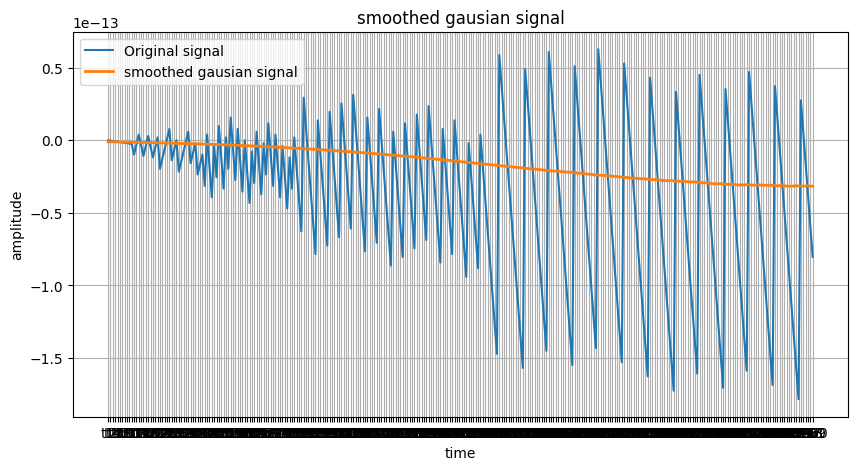

In [70]:
def gaussian_kernel(size, sigma=1):
    kernel = np.exp(-np.linspace(-size//2, size//2, size)**2 / (2*sigma**2))
    kernel = kernel / kernel.sum()  # Normalize to ensure sum equals 1
    return kernel
size = 519  # Kernel size
sigma = 86  # Standard deviation
kernel2 = gaussian_kernel(size, sigma)
kernel2 = kernel2[:len(signalmy)] 
smoothed_signal2 = np.convolve(signalmy, kernel2, mode='same') #החלקה גאוסיאנית 
plt.figure(figsize=(10, 5))
plt.plot(time_points, signalmy, label="Original signal")
plt.plot(time_points, smoothed_signal2, label="smoothed gausian signal", linewidth=2)
plt.title("smoothed gausian signal")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.grid(True)
plt.show()

# עבור נבדק 2  

  subject_id        t1        t2        t3        t4         t5         t6  \
1    SUB1002  0.614847  3.620707  4.235175  5.168476  10.485469  11.090081   

          t7         t8         t9  ...        t291        t292        t293  \
1  14.096657  14.691871  15.643932  ...  482.210251  485.215621  485.813787   

         t294        t295       t296        t297        t298        t299  \
1  486.763938  492.080435  492.68563  495.692688  496.290438  497.239163   

         t300  
1  502.555657  

[1 rows x 301 columns]
[np.float64(0.6148470503976567) np.float64(3.6207069972297177)
 np.float64(4.235175499692559) np.float64(5.16847649239935)
 np.float64(10.485469372360967) np.float64(11.090081137255765)
 np.float64(14.096657427377068) np.float64(14.691871300921775)
 np.float64(15.6439318517223) np.float64(16.761698913760483)
 np.float64(17.345222476986237) np.float64(20.35063716210425)
 np.float64(20.928925956133753) np.float64(21.899005571962334)
 np.float64(23.015653593000025) np.float

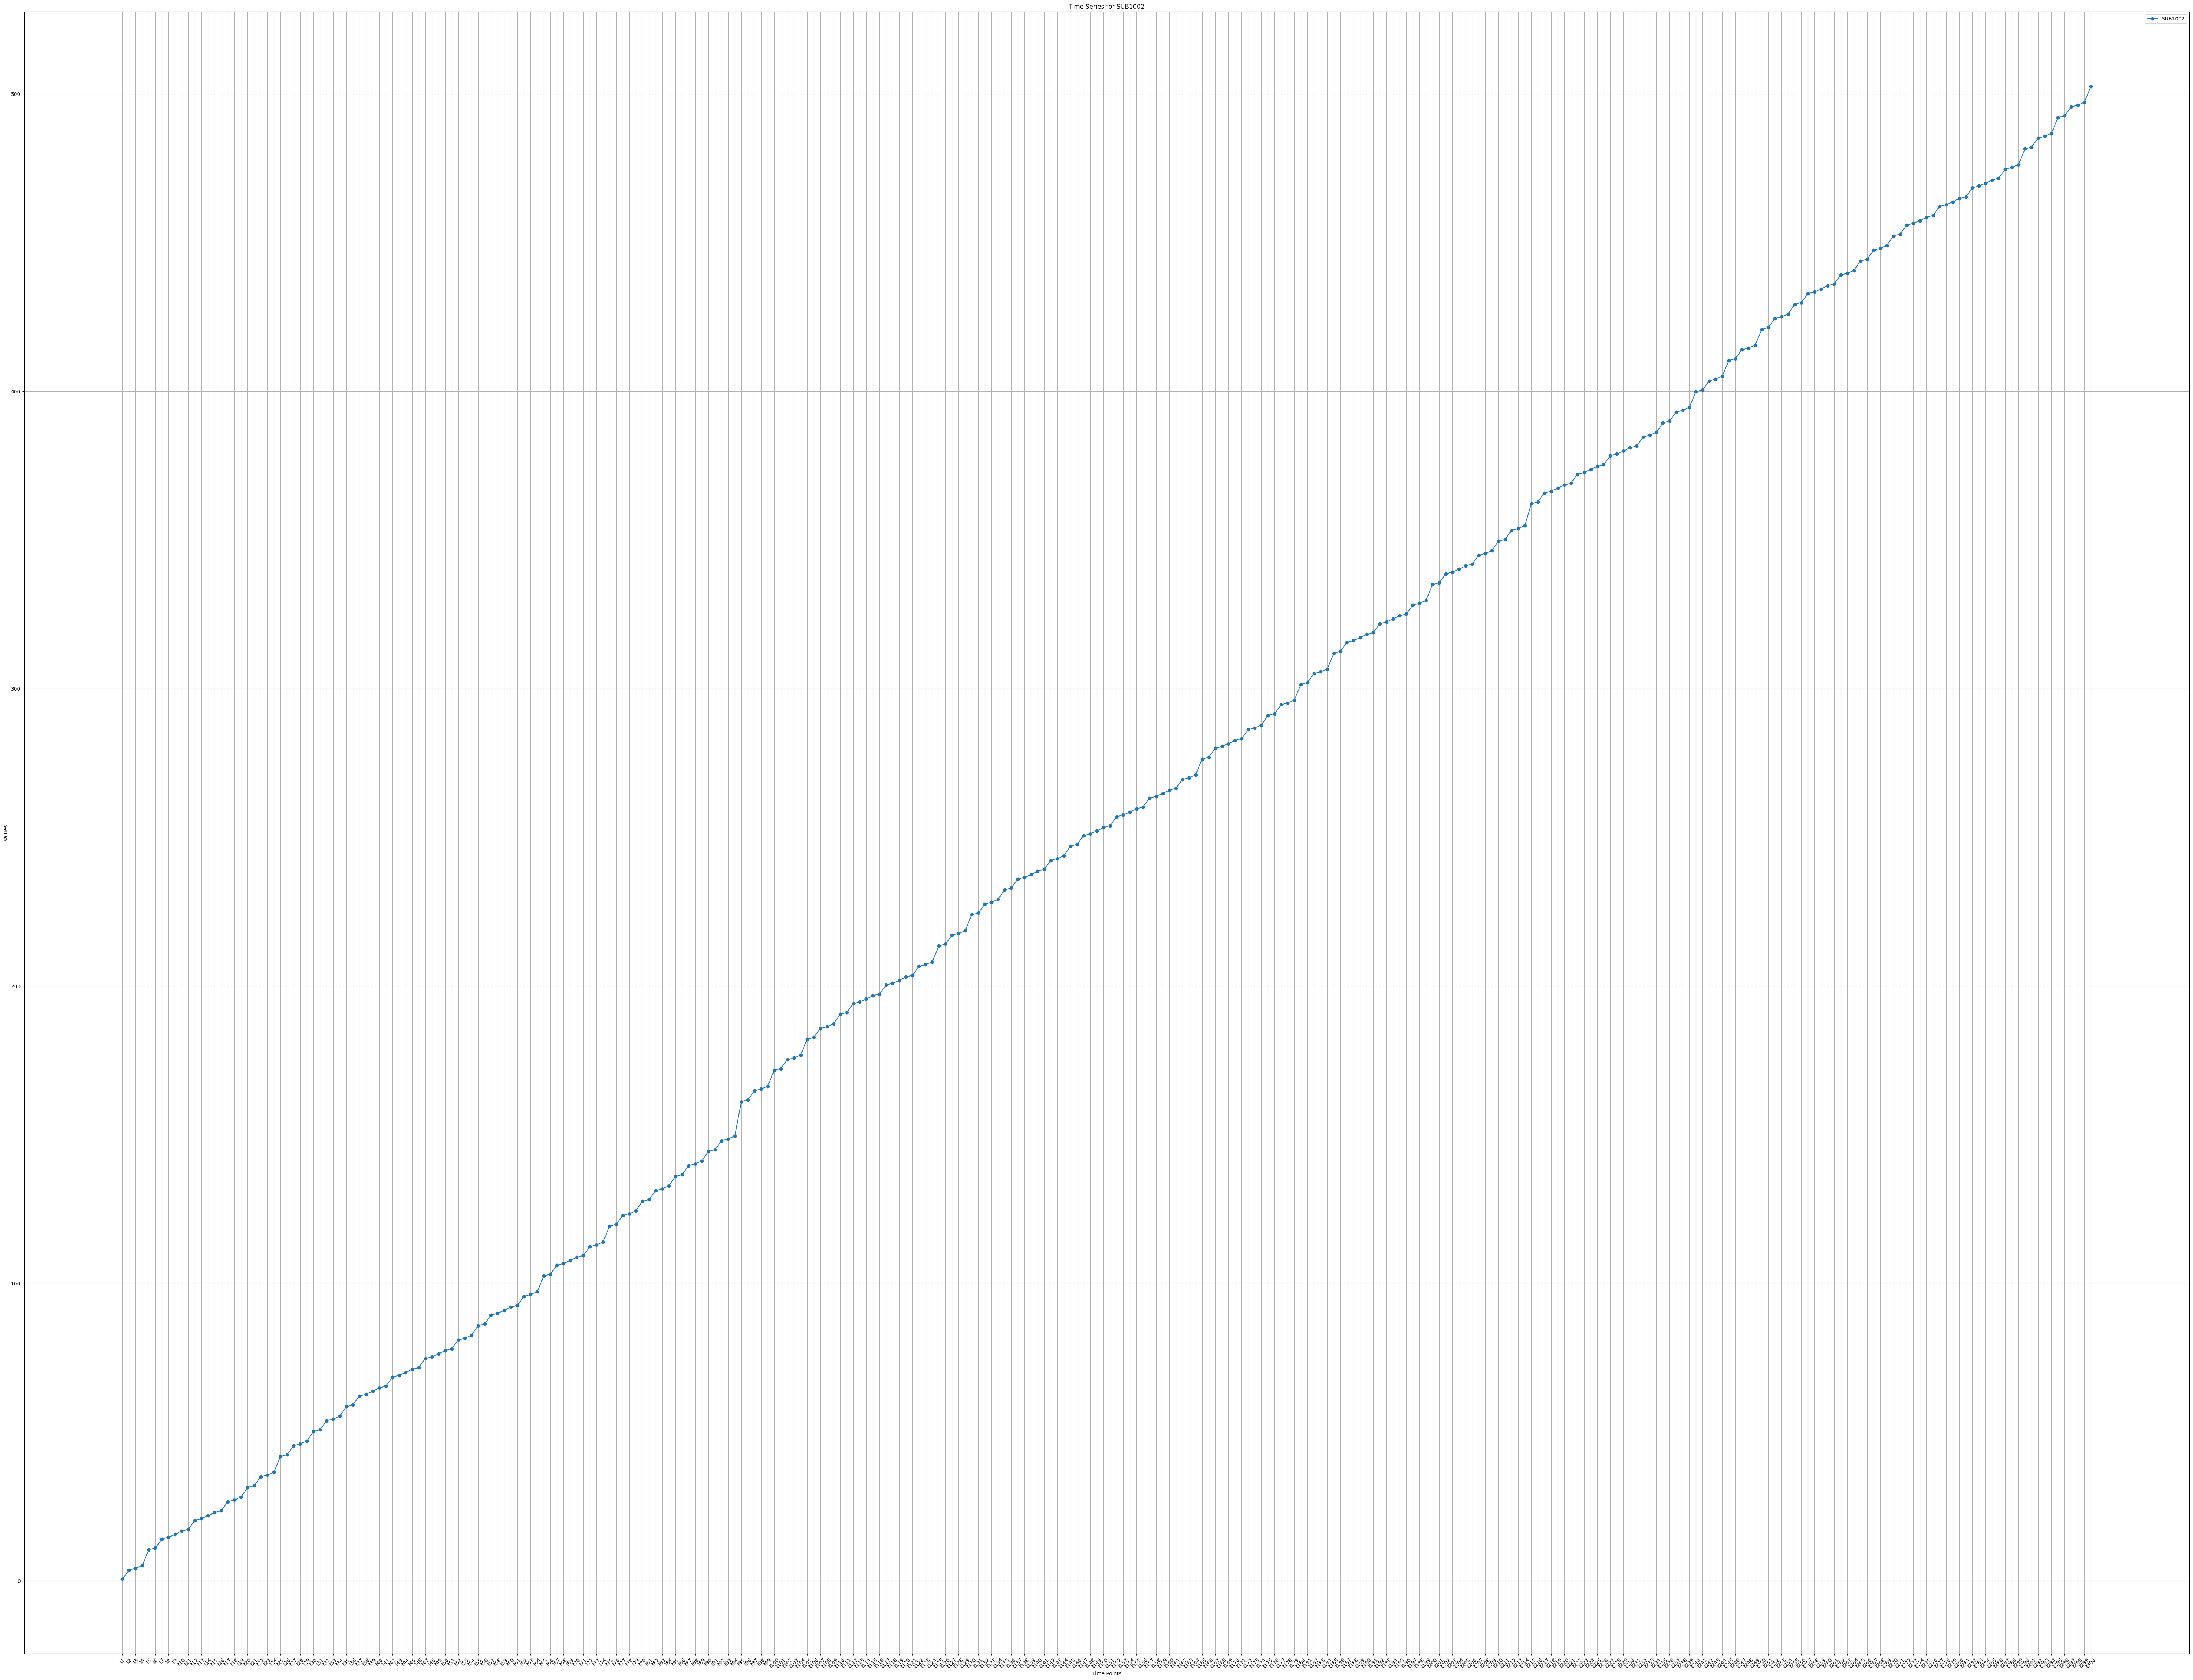

In [71]:
subject_data2 = df_range_end_columns[df_range_end_columns['subject_id'] == 'SUB1002'] #פלטור דאטה בשביל נבדק 2 
print(subject_data2) #בדיקה שנבדק כולל את הערכים הנדרשים 

time_points2 = subject_data2.columns[1:]  # Time points (e.g., t1, t2, t3, ...) עבור נבדק 1 
values = subject_data2.iloc[0, 1:].values  # Values 
print(values)
plt.figure(figsize=(60, 46))
plt.plot(time_points2, values, marker='o', label='SUB1002')
plt.title('Time Series for SUB1002')
plt.xlabel('Time Points')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
time_points_numeric2 = np.arange(len(time_points2)) #חישוב עבור נבדק 2 
amplitudemy2 = 1  # גובה (Amplitude)
frequencymy2 = 1  # תדר (Frequency) ב-Hz
signalmy2 = amplitudemy2 * np.sin(2 * np.pi * frequencymy2 * time_points_numeric2)

In [73]:
fft_signalmy2 = np.fft.fft(signalmy2) #חיושב פוריה 
frequenciesmy2 = np.fft.fftfreq(len(signalmy2), d=(time_points_numeric2[1] - time_points_numeric2[0]))

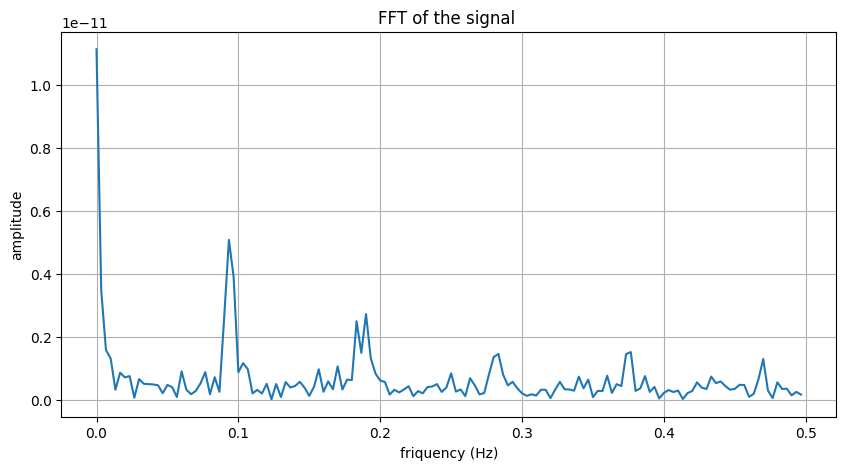

In [74]:
plt.figure(figsize=(10, 5)) #הצגת הFFT 
plt.plot(frequenciesmy2[:len(frequenciesmy2)//2], np.abs(fft_signalmy2)[:len(fft_signalmy2)//2])  # הצגת התדרים החיוביים
plt.title('FFT of the signal ')
plt.xlabel('friquency (Hz)')
plt.ylabel('amplitude')
plt.grid(True)
plt.show()

In [75]:
window_size2 = 10 #חלון קטן חסית  ורואים יותר פרטים 
smoothed_signal2 = np.convolve(signalmy2, np.ones(window_size2)/window_size2, mode='same')

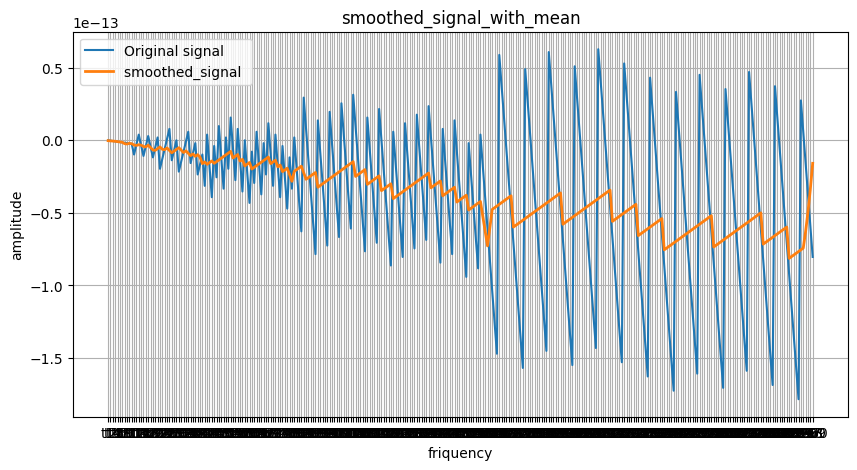

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(time_points2, signalmy2, label="Original signal")
plt.plot(time_points2, smoothed_signal2, label="smoothed_signal ", linewidth=2)
plt.title("smoothed_signal_with_mean")
plt.xlabel("friquency")
plt.ylabel("amplitude")
plt.legend()
plt.grid(True)
plt.show()

# עבור נבדק 3 

  subject_id       t1        t2        t3        t4         t5         t6  \
2    SUB1003  0.61682  3.622484  4.238911  5.170605  10.486601  11.091565   

          t7         t8         t9  ...        t291        t292        t293  \
2  14.097558  14.691815  15.645207  ...  485.147302  488.231839  488.828149   

         t294        t295        t296        t297       t298        t299  \
2  489.784855  495.101614  495.705534  498.711509  499.30824  500.259828   

         t300  
2  505.576334  

[1 rows x 301 columns]
[np.float64(0.6072510352823883) np.float64(3.6131885633803904)
 np.float64(4.220080370549113) np.float64(5.1611817459343)
 np.float64(10.478627434466034) np.float64(11.082435011398045)
 np.float64(14.088614037376827) np.float64(14.682488201302476)
 np.float64(15.636388362385333) np.float64(16.75461668544449)
 np.float64(17.354638480581343) np.float64(20.359947812277824)
 np.float64(20.95493075344712) np.float64(21.90809555351734)
 np.float64(23.025886161485687) np.float64(

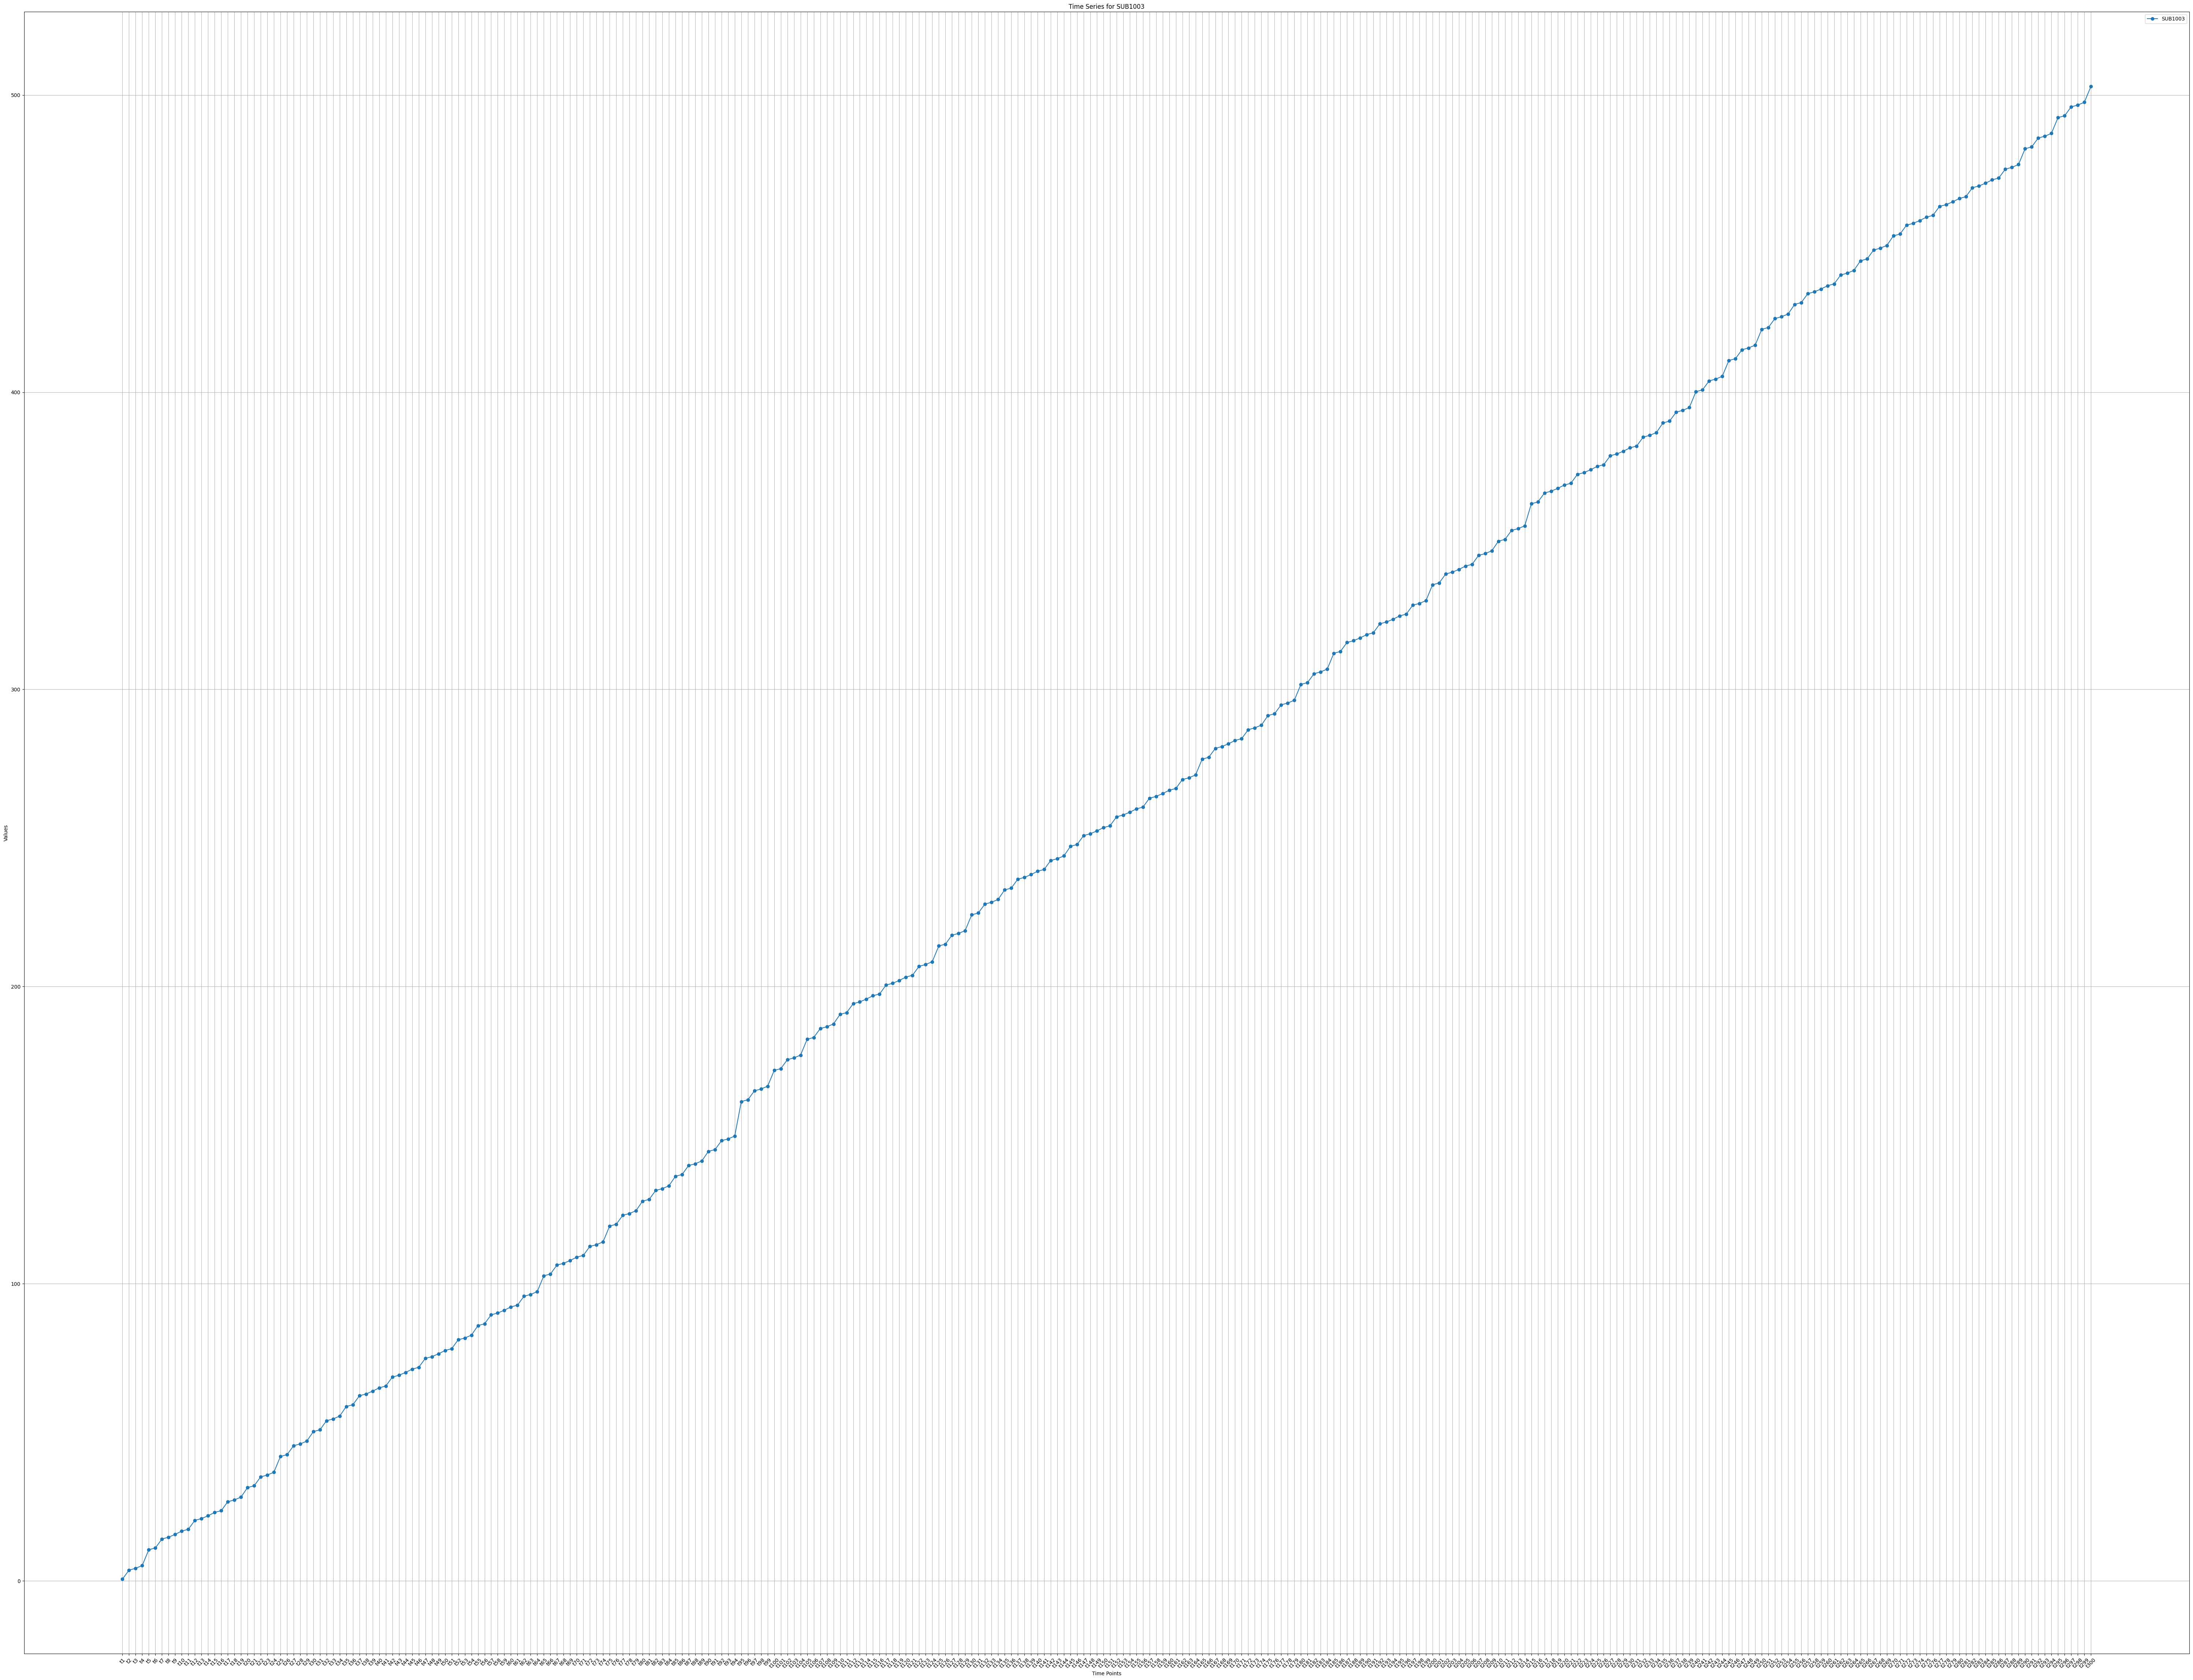

In [77]:
subject_data3 = df_range_end_columns[df_range_end_columns['subject_id'] == 'SUB1003'] #פלטור דאטה בשביל נבדק 3 
print(subject_data3) #בדיקה שנבדק כולל את הערכים הנדרשים 

time_points3 = subject_data.columns[1:]  # Time points (e.g., t1, t2, t3, ...) עבור נבדק 1 
values3 = subject_data.iloc[0, 1:].values  # Values 
print(values3)
plt.figure(figsize=(60, 46))
plt.plot(time_points3, values3, marker='o', label='SUB1003')
plt.title('Time Series for SUB1003')
plt.xlabel('Time Points')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
time_points_numeric3 = np.arange(len(time_points3)) #חישוב עבור נבדק 2 
amplitudemy3 = 1  # גובה (Amplitude)
frequencymy3 = 1  # תדר (Frequency) ב-Hz
signalmy3 = amplitudemy3 * np.sin(2 * np.pi * frequencymy3 * time_points_numeric3)

In [79]:
fft_signalmy3 = np.fft.fft(signalmy3) #חיושב פוריה 
frequenciesmy3 = np.fft.fftfreq(len(signalmy3), d=(time_points_numeric3[1] - time_points_numeric3[0]))

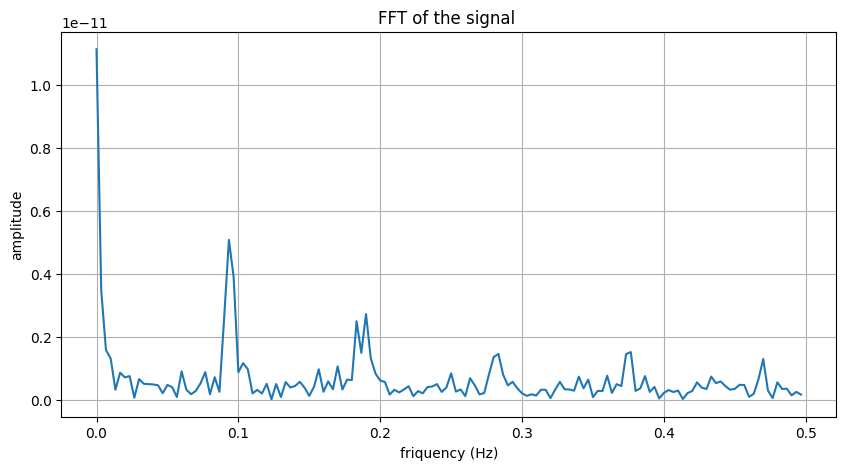

In [80]:
plt.figure(figsize=(10, 5)) #הצגת הFFT 
plt.plot(frequenciesmy3[:len(frequenciesmy3)//2], np.abs(fft_signalmy3)[:len(fft_signalmy3)//2])  # הצגת התדרים החיוביים
plt.title('FFT of the signal ')
plt.xlabel('friquency (Hz)')
plt.ylabel('amplitude')
plt.grid(True)
plt.show()

In [81]:
window_size3 = 30 #חלון קטן חסית  ורואים יותר פרטים 
smoothed_signal3 = np.convolve(signalmy3, np.ones(window_size3)/window_size3, mode='same')

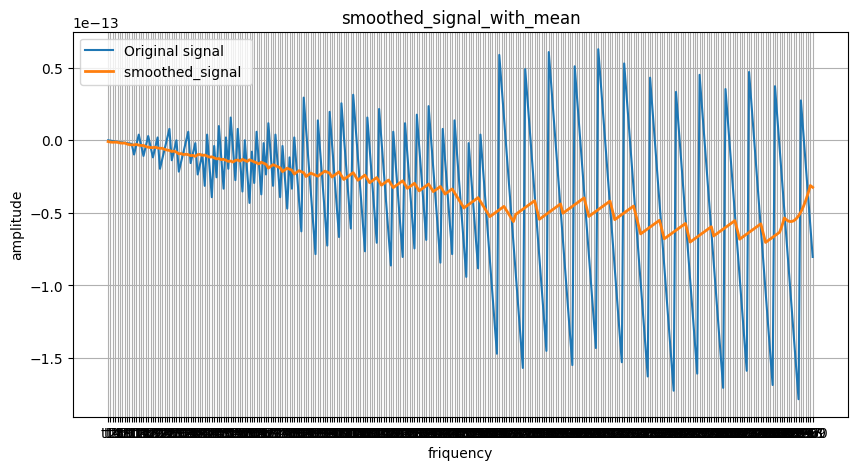

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(time_points3, signalmy3, label="Original signal")
plt.plot(time_points3, smoothed_signal3, label="smoothed_signal ", linewidth=2)
plt.title("smoothed_signal_with_mean")
plt.xlabel("friquency")
plt.ylabel("amplitude")
plt.legend()
plt.grid(True)
plt.show()

# עבור נבדק 4 

  subject_id        t1       t2        t3        t4         t5         t6  \
3    SUB1004  0.617733  3.62461  4.241919  5.171787  10.487992  11.093362   

          t7         t8         t9  ...        t291        t292        t293  \
3  14.098569  14.694741  15.647206  ...  482.346904  485.353674  485.951993   

         t294        t295        t296        t297        t298        t299  \
3  486.900558  492.217588  492.822151  495.828563  496.426056  497.375848   

         t300  
3  502.692538  

[1 rows x 301 columns]
[np.float64(0.6072510352823883) np.float64(3.6131885633803904)
 np.float64(4.220080370549113) np.float64(5.1611817459343)
 np.float64(10.478627434466034) np.float64(11.082435011398045)
 np.float64(14.088614037376827) np.float64(14.682488201302476)
 np.float64(15.636388362385333) np.float64(16.75461668544449)
 np.float64(17.354638480581343) np.float64(20.359947812277824)
 np.float64(20.95493075344712) np.float64(21.90809555351734)
 np.float64(23.025886161485687) np.float6

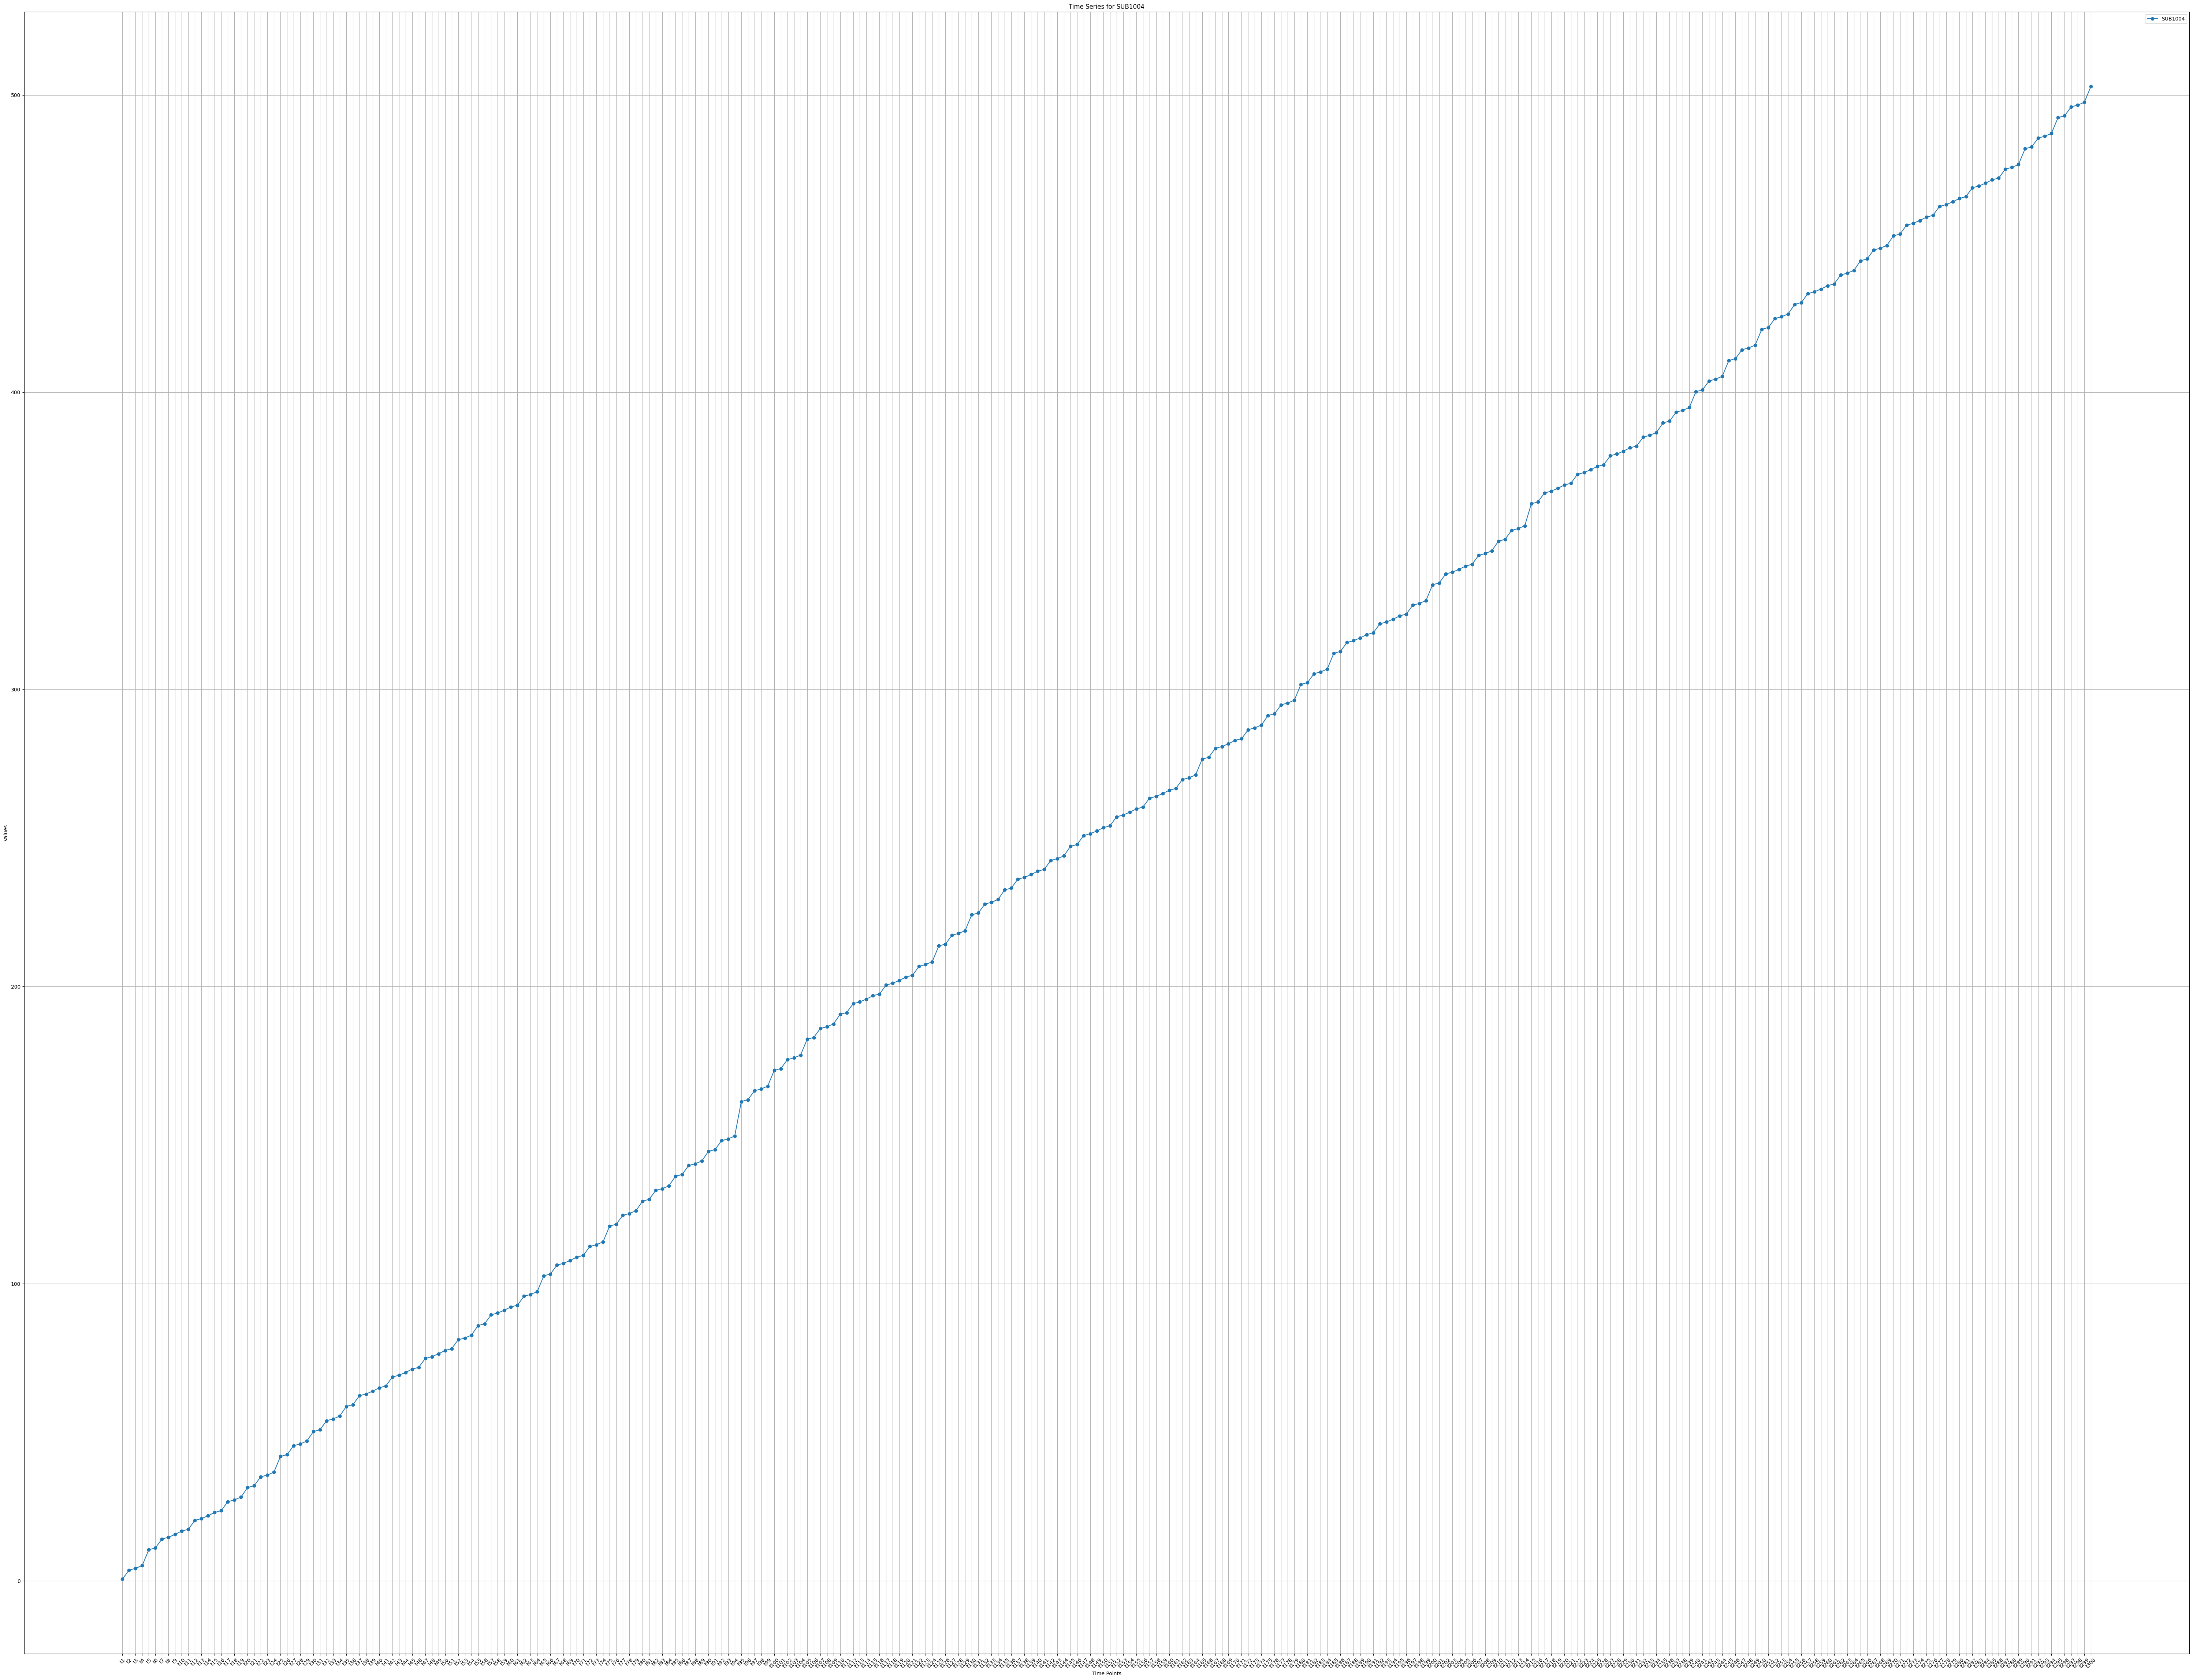

In [83]:
subject_data4 = df_range_end_columns[df_range_end_columns['subject_id'] == 'SUB1004'] #פלטור דאטה בשביל נבדק 4 
print(subject_data4) #בדיקה שנבדק כולל את הערכים הנדרשים 

time_points4 = subject_data.columns[1:]  # Time points (e.g., t1, t2, t3, ...) עבור נבדק 1 
values4 = subject_data.iloc[0, 1:].values  # Values 
print(values4)
plt.figure(figsize=(60, 46))
plt.plot(time_points4, values4, marker='o', label='SUB1004')
plt.title('Time Series for SUB1004')
plt.xlabel('Time Points')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [84]:
time_points_numeric4 = np.arange(len(time_points4)) #חישוב עבור נבדק 4 
amplitudemy4 = 1  # גובה (Amplitude)
frequencymy4 = 1  # תדר (Frequency) ב-Hz
signalmy4 = amplitudemy4 * np.sin(2 * np.pi * frequencymy4 * time_points_numeric4)

In [85]:
fft_signalmy4 = np.fft.fft(signalmy4) #חיושב פוריה 
frequenciesmy4 = np.fft.fftfreq(len(signalmy4), d=(time_points_numeric4[1] - time_points_numeric4[0]))

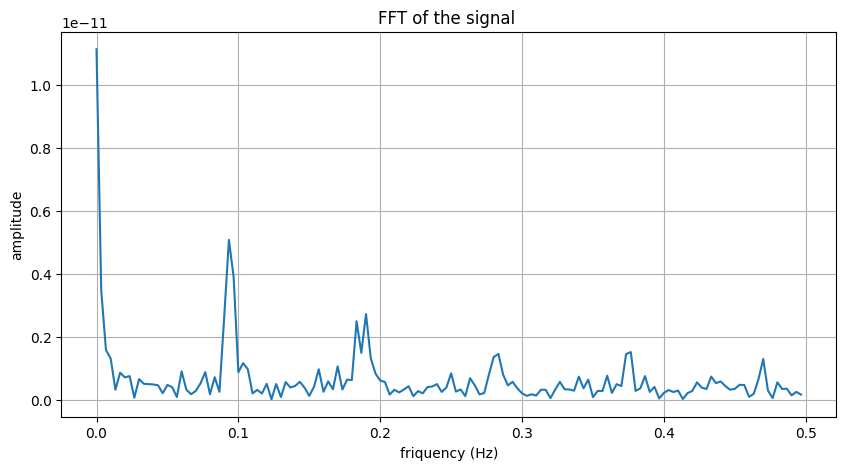

In [86]:
plt.figure(figsize=(10, 5)) #הצגת הFFT 
plt.plot(frequenciesmy4[:len(frequenciesmy4)//2], np.abs(fft_signalmy4)[:len(fft_signalmy4)//2])  # הצגת התדרים החיוביים
plt.title('FFT of the signal ')
plt.xlabel('friquency (Hz)')
plt.ylabel('amplitude')
plt.grid(True)
plt.show()

In [87]:
window_size4 = 60 #חלון גדול חסית  ורואים פחות פרטים 
smoothed_signal4 = np.convolve(signalmy4, np.ones(window_size4)/window_size4, mode='same')

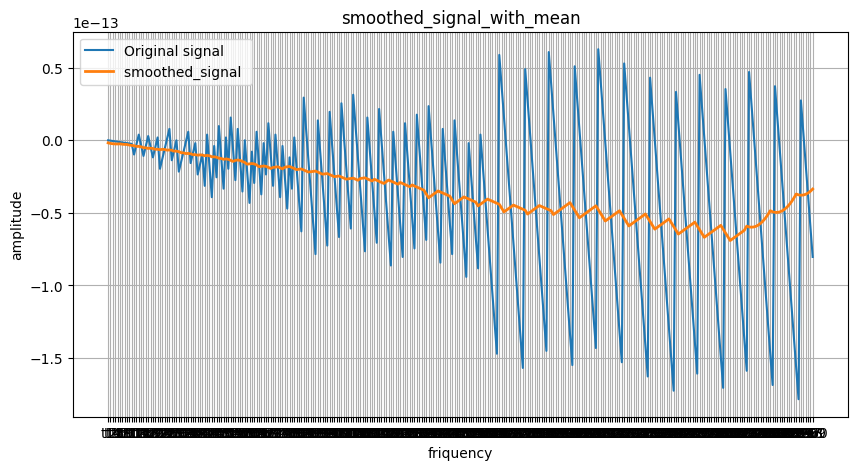

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(time_points4, signalmy4, label="Original signal")
plt.plot(time_points4, smoothed_signal4, label="smoothed_signal ", linewidth=2)
plt.title("smoothed_signal_with_mean")
plt.xlabel("friquency")
plt.ylabel("amplitude")
plt.legend()
plt.grid(True)
plt.show()